# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders_df = pd.read_csv("instacart_orders.csv",sep=";")
products_df = pd.read_csv("products.csv",sep=";")
aisles_df = pd.read_csv("aisles.csv",sep=";")
departments_orders_df = pd.read_csv("departments.csv",sep=";")
order_products_df = pd.read_csv("order_products.csv",sep=";")
 

In [3]:
#"Información de instacart_orders_df:"

instacart_orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
instacart_orders_df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [5]:
#"Información de products_df:"
products_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
#"Información de aisles_df:"
aisles_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [8]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
#"Información de departments_orders_df:"
departments_orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [10]:
departments_orders_df.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
#"Información de order_products_df:"
order_products_df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [12]:
order_products_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [13]:
# Revisa si hay 
dupli_instacart_orders_df = instacart_orders_df.duplicated().sum() 
print("pedidos duplicados instacart_orders_df:",dupli_instacart_orders_df)


pedidos duplicados instacart_orders_df: 15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [14]:
instacart_orders_df[instacart_orders_df==instacart_orders_df.duplicated().sum()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
478962,NaN,NaN,NaN,NaN,NaN,NaN
478963,NaN,NaN,NaN,NaN,NaN,NaN
478964,NaN,NaN,NaN,NaN,NaN,NaN
478965,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Elimina los pedidos duplicados

elim_duply = instacart_orders_df.drop_duplicates(inplace=True)


In [16]:
# Vuelve a verificar si hay filas duplicadas
print("pedidos duplicados instacart_orders_df:",elim_duply )

pedidos duplicados instacart_orders_df: None


In [17]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicated_ids = instacart_orders_df[instacart_orders_df.duplicated(['order_id'], keep=False)]
print("IDs de pedidos duplicados:", duplicated_ids['order_id'].nunique())


IDs de pedidos duplicados: 0


In [18]:
# Basándote en tus hallazgos,Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m
miercoles_2pm = instacart_orders_df[(instacart_orders_df["order_dow"]==3) & (instacart_orders_df["order_hour_of_day"]==14)]
print("Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m:", len(miercoles_2pm))
miercoles_2pm.count()

Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m: 4774


order_id                  4774
user_id                   4774
order_number              4774
order_dow                 4774
order_hour_of_day         4774
days_since_prior_order    4488
dtype: int64

### `products` data frame

In [19]:
# Verifica si hay filas totalmente duplicadas
dupli_products_df  = products_df.duplicated().sum()
print("pedidos duplicados products_df:",dupli_products_df )

pedidos duplicados products_df: 0


In [20]:
# Revisa únicamente si hay ID de departamentos duplicados
id_du = products_df[products_df.duplicated(["department_id"])]
print("ID de departamentos duplicados:", id_du["department_id"].nunique())

ID de departamentos duplicados: 21


In [21]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products_df["product_name"] = products_df["product_name"].str.upper()
name_dupli = products_df[products_df.duplicated(["product_name"])]
print("Nombres duplicados de productos:",name_dupli["product_name"].nunique())

Nombres duplicados de productos: 103


In [22]:
# Revisa si hay nombres duplicados de productos no faltantes

products_df[(products_df.duplicated(["product_name"])) & (products_df["product_name"].notna())]


,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


### `departments` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
dupli_departments_orders_df  = departments_orders_df.duplicated().sum()
print("pedidos duplicados departments_orders_df:",dupli_departments_orders_df )


pedidos duplicados departments_orders_df: 0


In [24]:
# Revisa únicamente si hay IDs duplicadas de productos
dep_id_du = departments_orders_df[departments_orders_df.duplicated(["department_id"])]
print("IDs duplicadas de productos:", dep_id_du["department_id"].duplicated())

IDs duplicadas de productos: Series([], Name: department_id, dtype: bool)


### `aisles` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
dupli_aisles_df  = aisles_df.duplicated().sum()
print("pedidos duplicados aisles_df:",dupli_aisles_df )

pedidos duplicados aisles_df: 0


In [26]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print("IDs duplicadas de pasillos:",aisles_df["aisle_id"].duplicated().sum())

IDs duplicadas de pasillos: 0


### `order_products` data frame

In [27]:
# Revisa si hay filas totalmente duplicadas
dupli_order_products_df  = order_products_df.duplicated().sum()
print("pedidos duplicados order_products_df:",dupli_order_products_df )

pedidos duplicados order_products_df: 0


In [28]:
order_products_df.head()


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [29]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
dupli_engaño = order_products_df.duplicated(subset=["order_id","product_id"]).sum()
print("verificar si hay cualquier otro duplicado engañoso:",dupli_engaño)

verificar si hay cualquier otro duplicado engañoso: 0


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [30]:
# Encuentra los valores ausentes en la columna 'product_name'
valor_ausentes = products_df.isna().sum()
print("valores ausentes en la columna 'product_name'")
print(valor_ausentes)

valores ausentes en la columna 'product_name'
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


 se encontro que hay 1258 valores ausentes 

In [31]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
pasillo_con_ID100 = products_df[(products_df["product_name"].isna()) & (products_df["aisle_id"] != 100)]
print("¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?")
pasillo_con_ID100

¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


,product_id,product_name,aisle_id,department_id


 Nos muestra que fuera del pasillo con ID 100 no hay valores ausentes, por lo que es verdad que están relacionados 

In [32]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
pasillo_con_ID21 = products_df[(products_df["product_name"].isna()) & (products_df["department_id"] != 21)]
print("¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?")
pasillo_con_ID21

¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


,product_id,product_name,aisle_id,department_id


Nos muestra que fuera del departamento con ID 21 no hay valores ausentes, por lo que es verdad que están relacionados  

In [33]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
departments_orders_df[departments_orders_df["department_id"] == 21] ["department"]



20    missing
Name: department, dtype: object

In [34]:
aisles_df[aisles_df["aisle_id"]==100]["aisle"]

99    missing
Name: aisle, dtype: object

en contramos que tanto como  pasillo con ID 100 y el departamento con ID 21  no existe por lo que estan perdidos 

In [35]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df["product_name"] = products_df["product_name"].fillna("Unknown")
products_df["product_name"].isna().sum()

0

 cambiamos los valores nulos por Unknown por lo cual nos muestra que tenemos 0 valores nulos 

### `orders` data frame

In [36]:
# Encuentra los valores ausentes
valor_ausente = instacart_orders_df.isna().sum()
valor_ausente

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [37]:
instacart_orders_df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [38]:
instacart_orders_df[instacart_orders_df["days_since_prior_order"].isnull()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


podemos ver que son nulos ya que es su primera orden 

In [39]:
# remplazar con 0 
instacart_order_df = instacart_orders_df.fillna(0)
instacart_order_df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [40]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
pedidos_no_primeros = instacart_orders_df[(instacart_orders_df["order_number"]!=1) & (instacart_orders_df["order_number"].isna())]
pedidos_no_primeros.sum()


order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

### `order_products` data frame

In [41]:
# Encuentra los valores ausentes
val_au = order_products_df.isna().sum()
val_au

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [42]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
valor_min = order_products_df["add_to_cart_order"].min()
valor_max = order_products_df["add_to_cart_order"].max()

print("Valor mínimo en 'add_to_cart_order':", valor_min)
print("Valor máximo en 'add_to_cart_order':", valor_max)

Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


In [43]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ID_valores_ausentes = order_products_df[order_products_df["add_to_cart_order"].isna()]

pedidos_valor_ausente_lista = sorted(list(ID_valores_ausentes["order_id"]))
pedidos_valor_ausente_lista

[9310,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 61355,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 102236,
 129627,
 129627,
 129627,
 129627,
 129627,
 165801,
 165801,
 165801,
 165801,
 165801,
 165801,
 171934,
 171934,
 171934,
 171934,
 171934,
 171934,
 171934,
 171934,
 171934,
 171934,
 171934,
 171934,
 17

In [44]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
val_au_64produ = order_products_df[(order_products_df["add_to_cart_order"].isna()) & (order_products_df["product_id"]<=64)]
val_au_64produ.head() 




,order_id,product_id,add_to_cart_order,reordered
757127,2926893,34,NaN,0
3495525,936852,34,NaN,1
3590777,1386261,10,NaN,1
3760909,3383594,63,NaN,0


In [45]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
datos_ausentes = order_products_df[order_products_df["add_to_cart_order"].isna()]
agrupar = datos_ausentes.groupby('order_id')
agrupar.head()

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4362962,1308785,35724,NaN,0
4365834,2625444,3096,NaN,0
4431614,180546,1194,NaN,0
4475851,2979697,15700,NaN,0


In [46]:
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
conteo_por_pedido = agrupar["product_id"].count()
ceu_num_product_id = conteo_por_pedido.sum()
valor_min_conteo = conteo_por_pedido.min()
print("Número total de 'product_id':", ceu_num_product_id)
print("Valor mínimo del conteo por pedido:", valor_min_conteo)


Número total de 'product_id': 836
Valor mínimo del conteo por pedido: 1


Describe brevemente cuáles son tus hallazgos.
¿Todos los pedidos con valores ausentes tienen más de 64 productos?
Según lo que dicen los datos, hay valores ausentes debajo de los 64 pedidos, por lo que no es verdad esta relación.

In [47]:

order_products_df[order_products_df['order_id'].isin(ID_valores_ausentes['order_id'])].groupby('order_id')['product_id'].count().min()

65

In [48]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_df["add_to_cart_order"] = order_products_df["add_to_cart_order"].fillna(999).astype(int)

val_a_999 = order_products_df.isna().sum()
val_a_999


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [49]:
hora_rango_order_hour = instacart_orders_df[(instacart_orders_df["order_hour_of_day"] >= 0) & (instacart_orders_df["order_hour_of_day"] <= 23)]
hora_rango_order_hour

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [50]:
import numpy as np

np.sort(instacart_orders_df["order_hour_of_day"].unique())


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [51]:
row_orden_dia = instacart_orders_df[(instacart_orders_df["order_dow"] >= 0) & (instacart_orders_df["order_dow"] <= 6)]
row_orden_dia

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [52]:
np.sort(instacart_orders_df["order_dow"].unique())

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

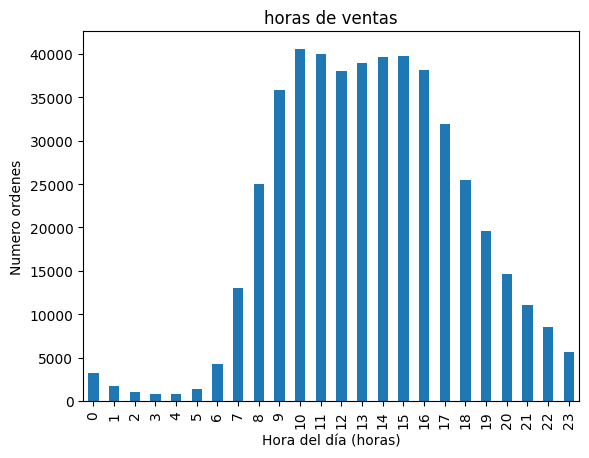

In [53]:
instacart_orders_df["order_hour_of_day"].value_counts().sort_index().plot(kind = "bar",              
                         title="horas de ventas",
                         xlabel="Hora del día (horas)",
                         ylabel="Numero ordenes",
                         )
plt.show()

 entre las 8h a las 18h se hicieron la mayor cantidad de pedidos 

### [A3] ¿Qué día de la semana compran víveres las personas?

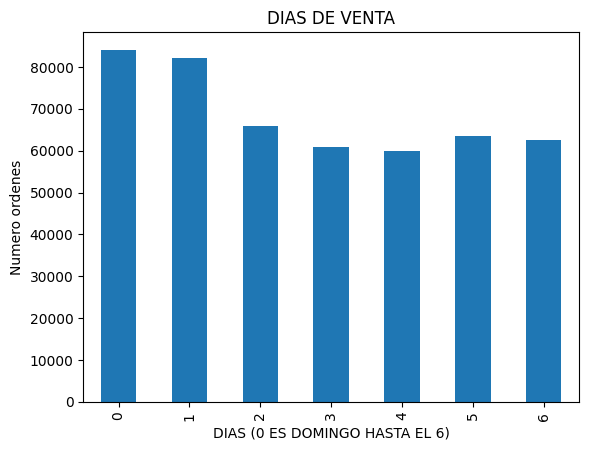

In [54]:
instacart_orders_df["order_dow"].value_counts().sort_index().plot(kind = "bar",              
                         title="DIAS DE VENTA",
                         xlabel="DIAS (0 ES DOMINGO HASTA EL 6)",
                         ylabel="Numero ordenes",
                         )
plt.show()

 Al parecer el dia de la semana que mas se hacen ordenes son el dia 0 y el dia 1 de la semana
Los domingos (0) son los días preferidos de los clientes

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

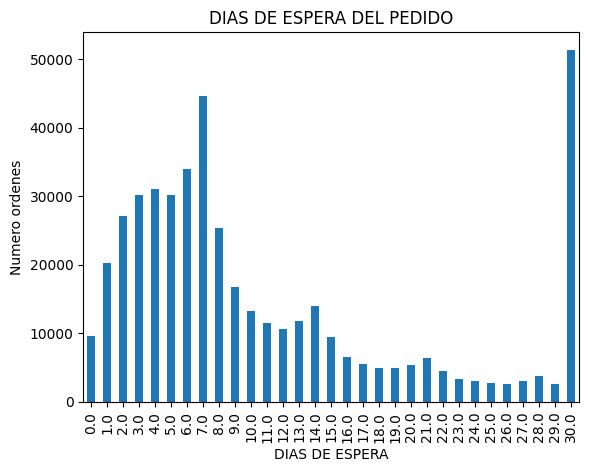

In [55]:

instacart_orders_df["days_since_prior_order"].value_counts().sort_index().plot(kind = "bar",              
                         title="DIAS DE ESPERA DEL PEDIDO",
                         xlabel="DIAS DE ESPERA",
                         ylabel="Numero ordenes",
                         )
plt.show()

 Al parecer, el número de días de espera máximo es de 30 días y el mínimo día de espera es de 29 días, pero del día 0 al día 9 también tiene una gran cantidad de pedidos en espera. Hasta este punto no podemos saber si realmente los usuarios esperan 30 días para realizar otra compra o es el sistema el que agrupa todas las compras que sean mayores a 30 días en el día 30. Con la gráfica podemos observar que la mayoría de usuarios se concentra entre 1 y 9 días donde después los números descienden gradualmente 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [56]:
miercoles = instacart_orders_df[instacart_orders_df["order_dow"]==3]
miercoles.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
6,2511640,148233,40,3,8,2.0
16,3109465,55090,19,3,15,9.0
28,133707,182261,1,3,10,NaN
30,1890318,193501,3,3,15,30.0
35,125325,106853,6,3,19,30.0


In [57]:
sabado = instacart_orders_df[instacart_orders_df["order_dow"]==6]
sabado.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
11,102585,191558,18,6,16,8.0
14,2843219,74699,4,6,11,30.0
20,50934,178510,9,6,9,5.0
26,1844247,122558,4,6,18,30.0


In [58]:
dia_3 = miercoles["order_hour_of_day"].value_counts().sort_index()

In [59]:
dia_6 = sabado["order_hour_of_day"].value_counts().sort_index()


In [60]:
x_dia = pd.concat([dia_3,dia_6],axis=1)
x_dia.columns = ["miercoles","sabado"]
x_dia


,miercoles,sabado
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246


<function matplotlib.pyplot.show(close=None, block=None)>

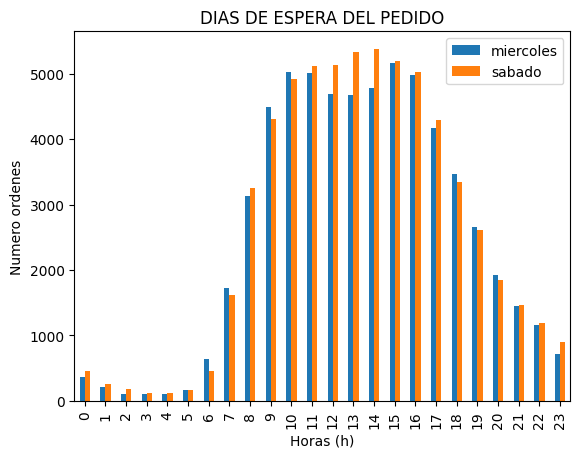

In [61]:
x_dia.plot(kind = "bar",              
                         title="DIAS DE ESPERA DEL PEDIDO",
                         xlabel="Horas (h)",
                         ylabel="Numero ordenes",)
plt.show

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [62]:
pedidos_por_cliente = instacart_orders_df.groupby("user_id")["order_id"].nunique()


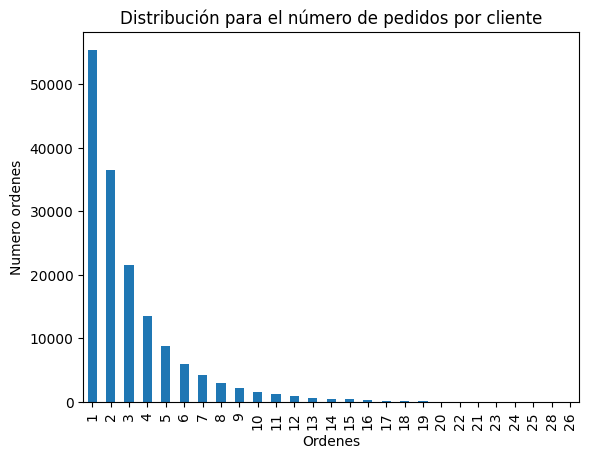

In [63]:
pedidos_por_cliente.value_counts().plot(kind = "bar",              
                         title="Distribución para el número de pedidos por cliente",
                         xlabel="Ordenes",
                         ylabel="Numero ordenes",
                         )
plt.show()

La mayoría de usuarios no ha hecho muchos pedidos, buenas observaciones.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [64]:
productos_20 = products_df["product_id"].value_counts().head(20)
productos_20

product_id
1        1
33146    1
33124    1
33125    1
33126    1
33127    1
33128    1
33129    1
33130    1
33131    1
33132    1
33133    1
33134    1
33135    1
33136    1
33137    1
33138    1
33139    1
33140    1
33141    1
Name: count, dtype: int64

In [65]:
productos_20 = order_products_df.merge(products_df,on="product_id")

In [66]:

product_names = productos_20.groupby(["product_id", "product_name"]).size().sort_values(ascending=False)
product_names


product_id  product_name                                          
24852       BANANA                                                    66050
13176       BAG OF ORGANIC BANANAS                                    53297
21137       ORGANIC STRAWBERRIES                                      37039
21903       ORGANIC BABY SPINACH                                      33971
47209       ORGANIC HASS AVOCADO                                      29773
                                                                      ...  
5836        ARCTIC D COD LIVER OIL LEMON                                  1
43573       WHISK- 10 INCH                                                1
43570       QUESO COTIJA                                                  1
36174       WHOLE PINTO BEANS                                             1
41403       EXTRA RICH & THICK SPAGHETTI SAUCE SPICES & SEASONINGS        1
Length: 45573, dtype: int64

In [67]:
product_names.head(20)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
dtype: int64

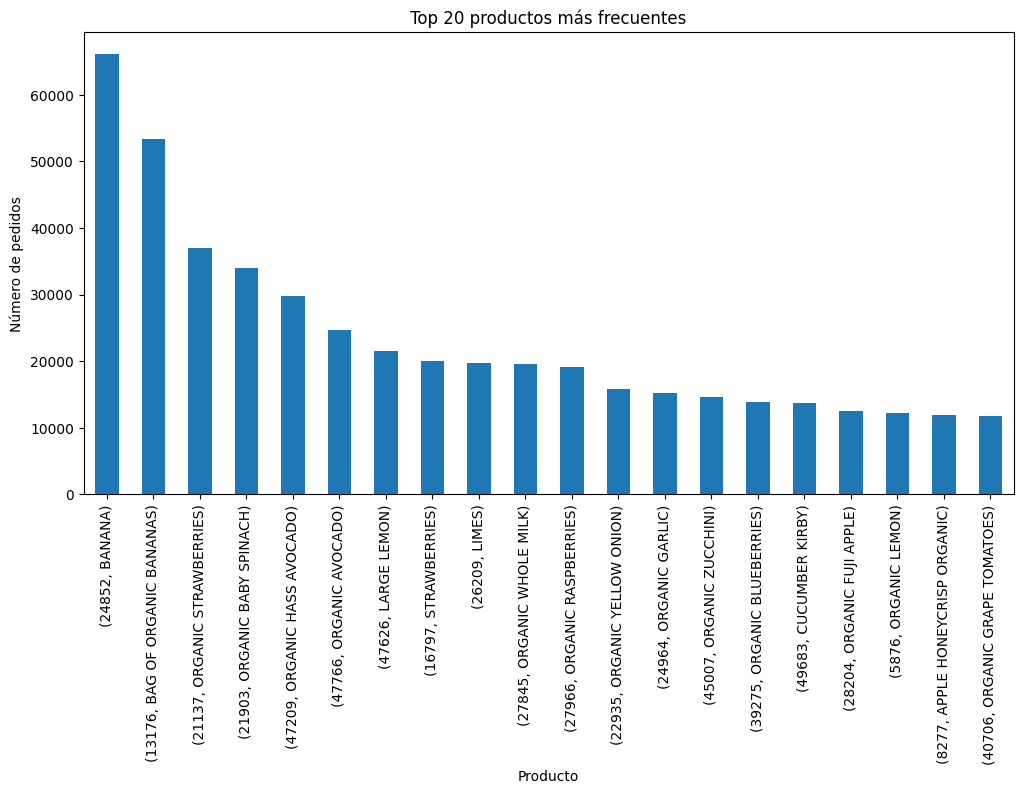

In [68]:


# Tomar los 20 primeros productos
top20 = product_names.head(20)

# Graficar
plt.figure(figsize=(12,6))
top20.plot(kind="bar")
plt.title("Top 20 productos más frecuentes")
plt.xlabel("Producto")
plt.ylabel("Número de pedidos")
plt.xticks(rotation=90)  # Rotar etiquetas para que se lean mejor
plt.show()


Los clientes tienden a comprar productos naturales,

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [69]:
articulos_por_pedido = order_products_df.groupby('order_id')['product_id'].count()
articulos_por_pedido

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

In [70]:
ax = articulos_por_pedido.value_counts().sort_index()
ax

product_id
1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: count, Length: 90, dtype: int64

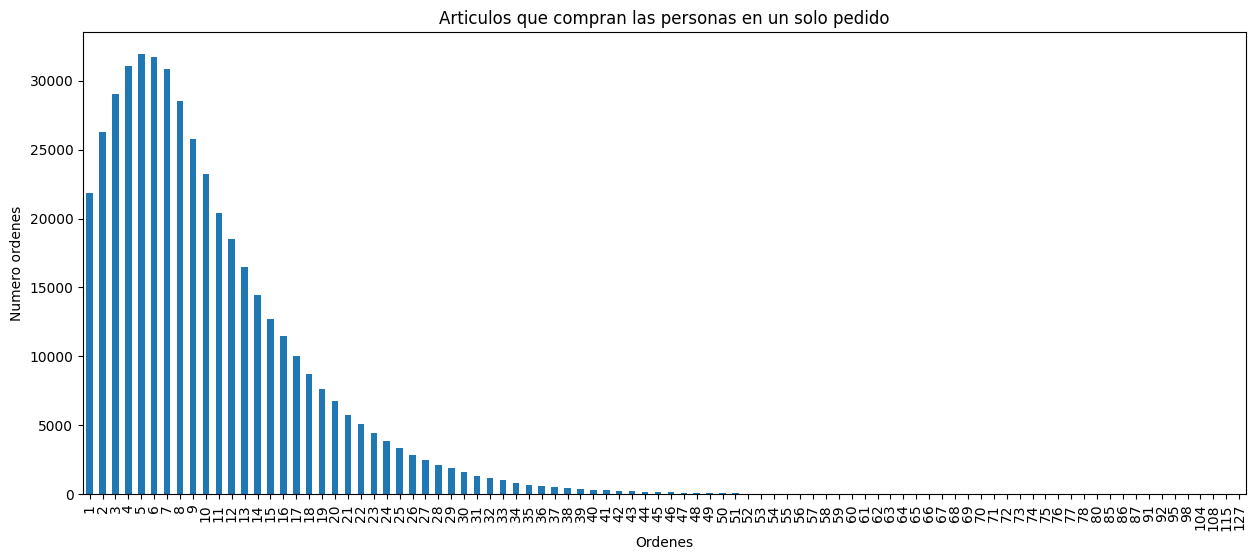

In [71]:
ax.plot(title="Articulos que compran las personas en un solo pedido",
      kind = "bar",
      xlabel="Ordenes",
      ylabel="Numero ordenes", 
      figsize=(15,6)
      )
plt.show()

Los usuarios suelen pedir alrededor de 10 articulos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [72]:
top_20_reordered_productos = order_products_df[order_products_df['reordered'] == 1]['product_id'].value_counts().head(20)
top_20_reordered_productos

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: count, dtype: int64

In [73]:
product_names = products_df[['product_id', 'product_name']].set_index('product_id')
product_names

,product_name
product_id,
1,CHOCOLATE SANDWICH COOKIES
2,ALL-SEASONS SALT
3,ROBUST GOLDEN UNSWEETENED OOLONG TEA
4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
5,GREEN CHILE ANYTIME SAUCE
...,...
49690,HIGH PERFORMANCE ENERGY DRINK
49691,ORIGINAL PANCAKE & WAFFLE MIX
49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR


In [74]:
top_20_reordered_product_names = product_names.loc[top_20_reordered_productos.index]

In [75]:
top_20_reordered_product_names.head(20)

,product_name
product_id,
24852,BANANA
13176,BAG OF ORGANIC BANANAS
21137,ORGANIC STRAWBERRIES
21903,ORGANIC BABY SPINACH
47209,ORGANIC HASS AVOCADO
47766,ORGANIC AVOCADO
27845,ORGANIC WHOLE MILK
47626,LARGE LEMON
27966,ORGANIC RASPBERRIES


Los productos naturales son consistentemente los más vendidos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [76]:
producto_pedidos = order_products_df['product_id'].value_counts().sum()

producto_pedidos

4545007

In [77]:
producto_reordenados = order_products_df[order_products_df['reordered'] == 1]['product_id'].value_counts()
producto_reordenados 

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
         ...  
40133        1
12061        1
45095        1
46185        1
47673        1
Name: count, Length: 36228, dtype: int64

In [79]:
tasa_repeticion = ((producto_reordenados / producto_pedidos)*100).fillna(0)
tasa_repeticion

product_id
24852    1.226907
13176    0.977996
21137    0.630120
21903    0.577183
47209    0.519889
           ...   
40133    0.000022
12061    0.000022
45095    0.000022
46185    0.000022
47673    0.000022
Name: count, Length: 36228, dtype: float64

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [80]:
combined_df = pd.merge(order_products_df, instacart_orders_df[['order_id', 'user_id']], on='order_id')
productos_totales_usuario = combined_df.groupby('user_id')['product_id'].count()
productos_reordenados_usuario = combined_df[combined_df['reordered'] == 1].groupby('user_id')['product_id'].count()


In [85]:
tasa_repeticion_usuario = (productos_reordenados_usuario / productos_totales_usuario).fillna(0)
tasa_repeticion_usuario.head(20)

user_id
2     0.038462
4     0.000000
5     0.666667
6     0.000000
7     0.928571
11    0.200000
12    0.250000
13    0.565217
14    0.360656
15    0.538462
16    0.531250
17    0.716981
19    0.291667
20    0.000000
21    0.400000
22    1.000000
24    0.500000
26    0.437500
27    0.658824
28    0.500000
Name: product_id, dtype: float64

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [86]:
primeros_productos = order_products_df[order_products_df['add_to_cart_order'] == 1]

In [87]:
top_20_primeros_productos = primeros_productos['product_id'].value_counts().head(20)

In [88]:
product_names = products_df[['product_id', 'product_name']].drop_duplicates().set_index('product_id')
top_20_primeros_product_names = product_names.loc[top_20_primeros_productos.index]
top_20_primeros_product_names['veces_primer_articulo'] = top_20_primeros_productos.values


top_20_primeros_product_names

,product_name,veces_primer_articulo
product_id,,
24852,BANANA,15562
13176,BAG OF ORGANIC BANANAS,11026
27845,ORGANIC WHOLE MILK,4363
21137,ORGANIC STRAWBERRIES,3946
47209,ORGANIC HASS AVOCADO,3390
21903,ORGANIC BABY SPINACH,3336
47766,ORGANIC AVOCADO,3044
19660,SPRING WATER,2336
16797,STRAWBERRIES,2308


In [ ]:
Una vez más los productos orgánicos estan en el top de la lista